In [5]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [6]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

<Figure size 640x480 with 1 Axes>

# Normal Perceptron Learning Alogorithm

In [7]:
#Perceptron Learning Algorithm
class Perceptron(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.update = 0
    
    def predict(self, x):
        activation = np.dot(self.W.T,x)
        return np.sign(activation)
    
    def fit(self, data):
        count = 0
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        while True:
            self.update = 0
            for i in range(len(data)):
                predicted_value_y = self.predict(X[i])
                expected_value = d[i]
                if expected_value * predicted_value_y <=0:
                    self.W = self.W + expected_value * X[i]
                    count += 1
                    self.update += 1
                    break
            if self.update == 0:
                break
        return count

# Varying 'sep' from 0.2 to 5

In [8]:
sep = 0.2
sep_list = []
updates_list = []
while sep < 5.2:
    sep_list.append(sep)
    top,bottom = generatedata(rad,thk,sep,1000)
    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]

    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]
    
    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2

    data = np.array(data)
    np.random.shuffle(data)
    perceptron = Perceptron(data)
    updates = perceptron.fit(data)
    updates_list.append(updates)
    #print("sep:",sep)
    #print("updates:", updates)
    sep += 0.2
    
    
    
    

# Plotting the recorded iterations(updates) vs sep

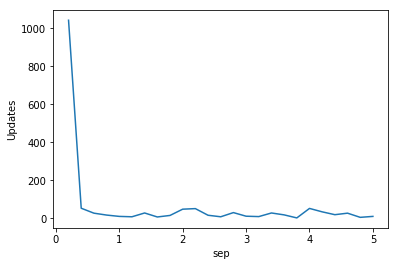

In [9]:

plt.plot(sep_list, updates_list) #plotting hypothesis
plt.xlabel("sep");
plt.ylabel("Updates");
plt.show()